<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Grouping Data with Pandas

---

You are going to investigate UFO sightings around the US.  This lab will give you practice performing `groupby` operations to split data along multiple dimensions and investigate patterns between subsets of the data using basic aggregation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [2]:
# A:
df = pd.read_csv('../../../../../resource-datasets/ufo_sightings/ufo.csv')

In [3]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [4]:
# A:
df.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [5]:
df.shape

(80543, 5)

#### 3. Which city has the most observations?

In [6]:
#we can use .value_counts() for this question:
df['City'].value_counts().head(8)

Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Los Angeles      416
San Diego        401
Houston          340
Name: City, dtype: int64

In [7]:
#we can ask 'what index corresponds to the maximum value?' using .idxmax()
df['City'].value_counts().idxmax()

'Seattle'

In [8]:
#or we know that .value_counts() will always give us the biggest count first, 
#so we can take the first index
df['City'].value_counts().index[0]

'Seattle'

In [9]:
#OR, instead of .value_counts(), we can use .groupby().size() 
#but this doesn't return the counts in order of size
df.groupby('City').size().head(8)

City
((HOAX??))                        1
((Unspecified location))          1
(City not specified)              1
(above mountains in airplane)     1
Abbeville                         7
Aberdeen                         21
Abilene                          34
Abingdon                         15
dtype: int64

In [10]:
#you can order the .size() result with .sort_values()
df.groupby('City').size().sort_values(ascending=False).head(8)

City
Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Los Angeles      416
San Diego        401
Houston          340
dtype: int64

In [11]:
#or, as before, we can use .idxmax()
df.groupby('City').size().idxmax()

'Seattle'

#### 4. What is the observation count per shape?

In [12]:
#we can use .value_counts() for this
df['Shape Reported'].value_counts()

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
ROUND            2
CRESCENT         2
PYRAMID          1
DOME             1
HEXAGON          1
FLARE            1
Name: Shape Reported, dtype: int64

In [13]:
#or we can use .size(), but it won't be in order
df.groupby('Shape Reported').size()

Shape Reported
CHEVRON        940
CIGAR         1983
CIRCLE        7725
CONE           310
CRESCENT         2
CROSS          241
CYLINDER      1252
DELTA            7
DIAMOND       1152
DISK          5226
DOME             1
EGG            733
FIREBALL      6249
FLARE            1
FLASH         1329
FORMATION     2405
HEXAGON          1
LIGHT        16332
OTHER         5506
OVAL          3721
PYRAMID          1
RECTANGLE     1295
ROUND            2
SPHERE        5231
TEARDROP       723
TRIANGLE      7816
VARIOUS       1957
dtype: int64

In [14]:
#we can order with .sort_values()
df.groupby('Shape Reported').size().sort_values(ascending=False)

Shape Reported
LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
DOME             1
HEXAGON          1
PYRAMID          1
FLARE            1
dtype: int64

In [15]:
df.groupby('Shape Reported').size().sort_values(ascending=False).index[0]

'LIGHT'

#### 5. Create a subset of the data that is the top 5 cities and the top 5 shapes.

In [16]:
#we can create a list of the top cities using the index of value_counts() 
topcities = list(df['City'].value_counts().index[0:5])
topcities

['Seattle', 'New York City', 'Phoenix', 'Las Vegas', 'Portland']

In [17]:
#or we can use the index of .size().sort_values()
topshapes = list(df.groupby('Shape Reported').size().sort_values(ascending=False)[0:5].index)
topshapes

['LIGHT', 'TRIANGLE', 'CIRCLE', 'FIREBALL', 'OTHER']

In [18]:
subset = df.loc[(df['City'].isin(topcities)) & 
                   (df['Shape Reported'].isin(topshapes))]
subset.shape

(1322, 5)

In [19]:
df.shape

(80543, 5)

#### 6. With the subset, find the percent of each shape seen by city.

In [20]:
subset.head() 

,City,Colors Reported,Shape Reported,State,Time
96,New York City,NaN,CIRCLE,NY,8/1/1948 2:00
208,New York City,NaN,OTHER,NY,7/15/1952 19:00
313,New York City,NaN,LIGHT,NY,2/15/1955 19:00
367,New York City,NaN,LIGHT,NY,6/15/1956 21:00
568,New York City,NaN,OTHER,NY,10/1/1959 16:00


In [21]:
grouped_by_city_and_shape = subset.groupby(['City','Shape Reported']).size()
grouped_by_city_and_shape

City           Shape Reported
Las Vegas      CIRCLE             42
               FIREBALL           22
               LIGHT              85
               OTHER              36
               TRIANGLE           31
New York City  CIRCLE             56
               FIREBALL           35
               LIGHT             105
               OTHER              42
               TRIANGLE           40
Phoenix        CIRCLE             34
               FIREBALL           35
               LIGHT             106
               OTHER              46
               TRIANGLE           45
Portland       CIRCLE             46
               FIREBALL           29
               LIGHT             100
               OTHER              29
               TRIANGLE           27
Seattle        CIRCLE             50
               FIREBALL           55
               LIGHT             129
               OTHER              51
               TRIANGLE           46
dtype: int64

In [22]:
df_1 = grouped_by_city_and_shape.reset_index() #this will turn it into a dataframe
df_1.head(10)

,City,Shape Reported,0
0,Las Vegas,CIRCLE,42
1,Las Vegas,FIREBALL,22
2,Las Vegas,LIGHT,85
3,Las Vegas,OTHER,36
4,Las Vegas,TRIANGLE,31
5,New York City,CIRCLE,56
6,New York City,FIREBALL,35
7,New York City,LIGHT,105
8,New York City,OTHER,42
9,New York City,TRIANGLE,40


In [23]:
df_1.columns = ['City','Shape Reported','Counts'] #just renaming the columns

In [24]:
group_1 = df_1.groupby('City')['Counts'].get_group('Las Vegas')

In [25]:
group_1

0    42
1    22
2    85
3    36
4    31
Name: Counts, dtype: int64

In [26]:
group_1.sum()

216

In [27]:
group_1/group_1.sum()

0    0.194444
1    0.101852
2    0.393519
3    0.166667
4    0.143519
Name: Counts, dtype: float64

In [28]:
def get_percentage(x):
    return x/x.sum()*100

In [29]:
df_1.groupby('City')['Counts'].apply(get_percentage)

0     19.444444
1     10.185185
2     39.351852
3     16.666667
4     14.351852
5     20.143885
6     12.589928
7     37.769784
8     15.107914
9     14.388489
10    12.781955
11    13.157895
12    39.849624
13    17.293233
14    16.917293
15    19.913420
16    12.554113
17    43.290043
18    12.554113
19    11.688312
20    15.105740
21    16.616314
22    38.972810
23    15.407855
24    13.897281
Name: Counts, dtype: float64

In [30]:
#create new columns using count compared to a groupby city sum

df_1['Percentage'] = df_1.groupby('City')['Counts'].apply(lambda x: x/np.sum(x)*100)
df_1

,City,Shape Reported,Counts,Percentage
0,Las Vegas,CIRCLE,42,19.444444
1,Las Vegas,FIREBALL,22,10.185185
2,Las Vegas,LIGHT,85,39.351852
3,Las Vegas,OTHER,36,16.666667
4,Las Vegas,TRIANGLE,31,14.351852
5,New York City,CIRCLE,56,20.143885
6,New York City,FIREBALL,35,12.589928
7,New York City,LIGHT,105,37.769784
8,New York City,OTHER,42,15.107914
9,New York City,TRIANGLE,40,14.388489


In [31]:
# alternatively, you could accomplish this using .div()
by_city_and_shape = subset.groupby(['City','Shape Reported']).size()
by_city_and_shape

City           Shape Reported
Las Vegas      CIRCLE             42
               FIREBALL           22
               LIGHT              85
               OTHER              36
               TRIANGLE           31
New York City  CIRCLE             56
               FIREBALL           35
               LIGHT             105
               OTHER              42
               TRIANGLE           40
Phoenix        CIRCLE             34
               FIREBALL           35
               LIGHT             106
               OTHER              46
               TRIANGLE           45
Portland       CIRCLE             46
               FIREBALL           29
               LIGHT             100
               OTHER              29
               TRIANGLE           27
Seattle        CIRCLE             50
               FIREBALL           55
               LIGHT             129
               OTHER              51
               TRIANGLE           46
dtype: int64

In [32]:
(subset.groupby('City')['State'].count())

City
Las Vegas        216
New York City    278
Phoenix          266
Portland         231
Seattle          331
Name: State, dtype: int64

In [33]:
by_city = subset.groupby('City').size()
by_city

City
Las Vegas        216
New York City    278
Phoenix          266
Portland         231
Seattle          331
dtype: int64

In [34]:
#.div() allows us to divide one Series by the other, matching on the 'City' index
by_city_and_shape.div(by_city,level='City')*100

City           Shape Reported
Las Vegas      CIRCLE            19.444444
               FIREBALL          10.185185
               LIGHT             39.351852
               OTHER             16.666667
               TRIANGLE          14.351852
New York City  CIRCLE            20.143885
               FIREBALL          12.589928
               LIGHT             37.769784
               OTHER             15.107914
               TRIANGLE          14.388489
Phoenix        CIRCLE            12.781955
               FIREBALL          13.157895
               LIGHT             39.849624
               OTHER             17.293233
               TRIANGLE          16.917293
Portland       CIRCLE            19.913420
               FIREBALL          12.554113
               LIGHT             43.290043
               OTHER             12.554113
               TRIANGLE          11.688312
Seattle        CIRCLE            15.105740
               FIREBALL          16.616314
               LIGHT    

In [35]:
#if we wanted to round each of these to one decimal place, we can wrap it in np.round()
np.round(by_city_and_shape.div(by_city,level='City')*100,1)

City           Shape Reported
Las Vegas      CIRCLE            19.4
               FIREBALL          10.2
               LIGHT             39.4
               OTHER             16.7
               TRIANGLE          14.4
New York City  CIRCLE            20.1
               FIREBALL          12.6
               LIGHT             37.8
               OTHER             15.1
               TRIANGLE          14.4
Phoenix        CIRCLE            12.8
               FIREBALL          13.2
               LIGHT             39.8
               OTHER             17.3
               TRIANGLE          16.9
Portland       CIRCLE            19.9
               FIREBALL          12.6
               LIGHT             43.3
               OTHER             12.6
               TRIANGLE          11.7
Seattle        CIRCLE            15.1
               FIREBALL          16.6
               LIGHT             39.0
               OTHER             15.4
               TRIANGLE          13.9
dtype: float64

In [36]:
by_city_and_shape.shape, by_city.shape

((25,), (5,))

In [37]:
np.round(by_city_and_shape.div(by_city)*100,1)

City           Shape Reported
Las Vegas      CIRCLE            19.4
               FIREBALL          10.2
               LIGHT             39.4
               OTHER             16.7
               TRIANGLE          14.4
New York City  CIRCLE            20.1
               FIREBALL          12.6
               LIGHT             37.8
               OTHER             15.1
               TRIANGLE          14.4
Phoenix        CIRCLE            12.8
               FIREBALL          13.2
               LIGHT             39.8
               OTHER             17.3
               TRIANGLE          16.9
Portland       CIRCLE            19.9
               FIREBALL          12.6
               LIGHT             43.3
               OTHER             12.6
               TRIANGLE          11.7
Seattle        CIRCLE            15.1
               FIREBALL          16.6
               LIGHT             39.0
               OTHER             15.4
               TRIANGLE          13.9
dtype: float64

**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

In [38]:
by_city_and_shape.unstack()

Shape Reported,CIRCLE,FIREBALL,LIGHT,OTHER,TRIANGLE
City,,,,,
Las Vegas,42,22,85,36,31
New York City,56,35,105,42,40
Phoenix,34,35,106,46,45
Portland,46,29,100,29,27
Seattle,50,55,129,51,46


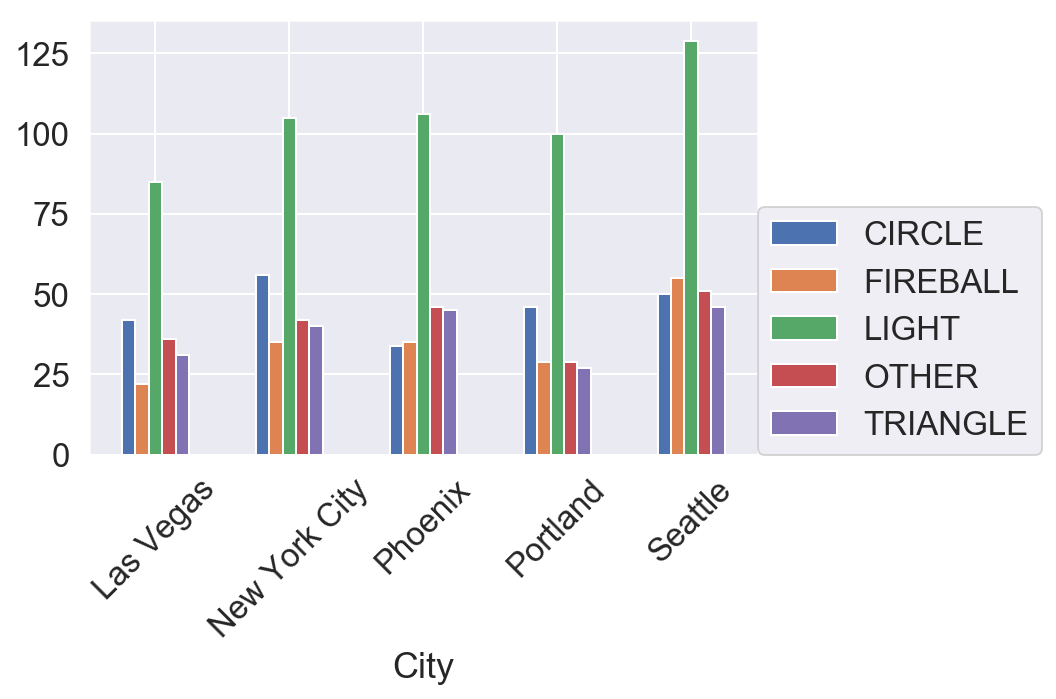

In [39]:
#this might be our first attempt to plot the counts of shape seen by city
by_city_and_shape.unstack().plot(kind='bar')
plt.legend(loc=[1,0])
plt.xticks(rotation=45);

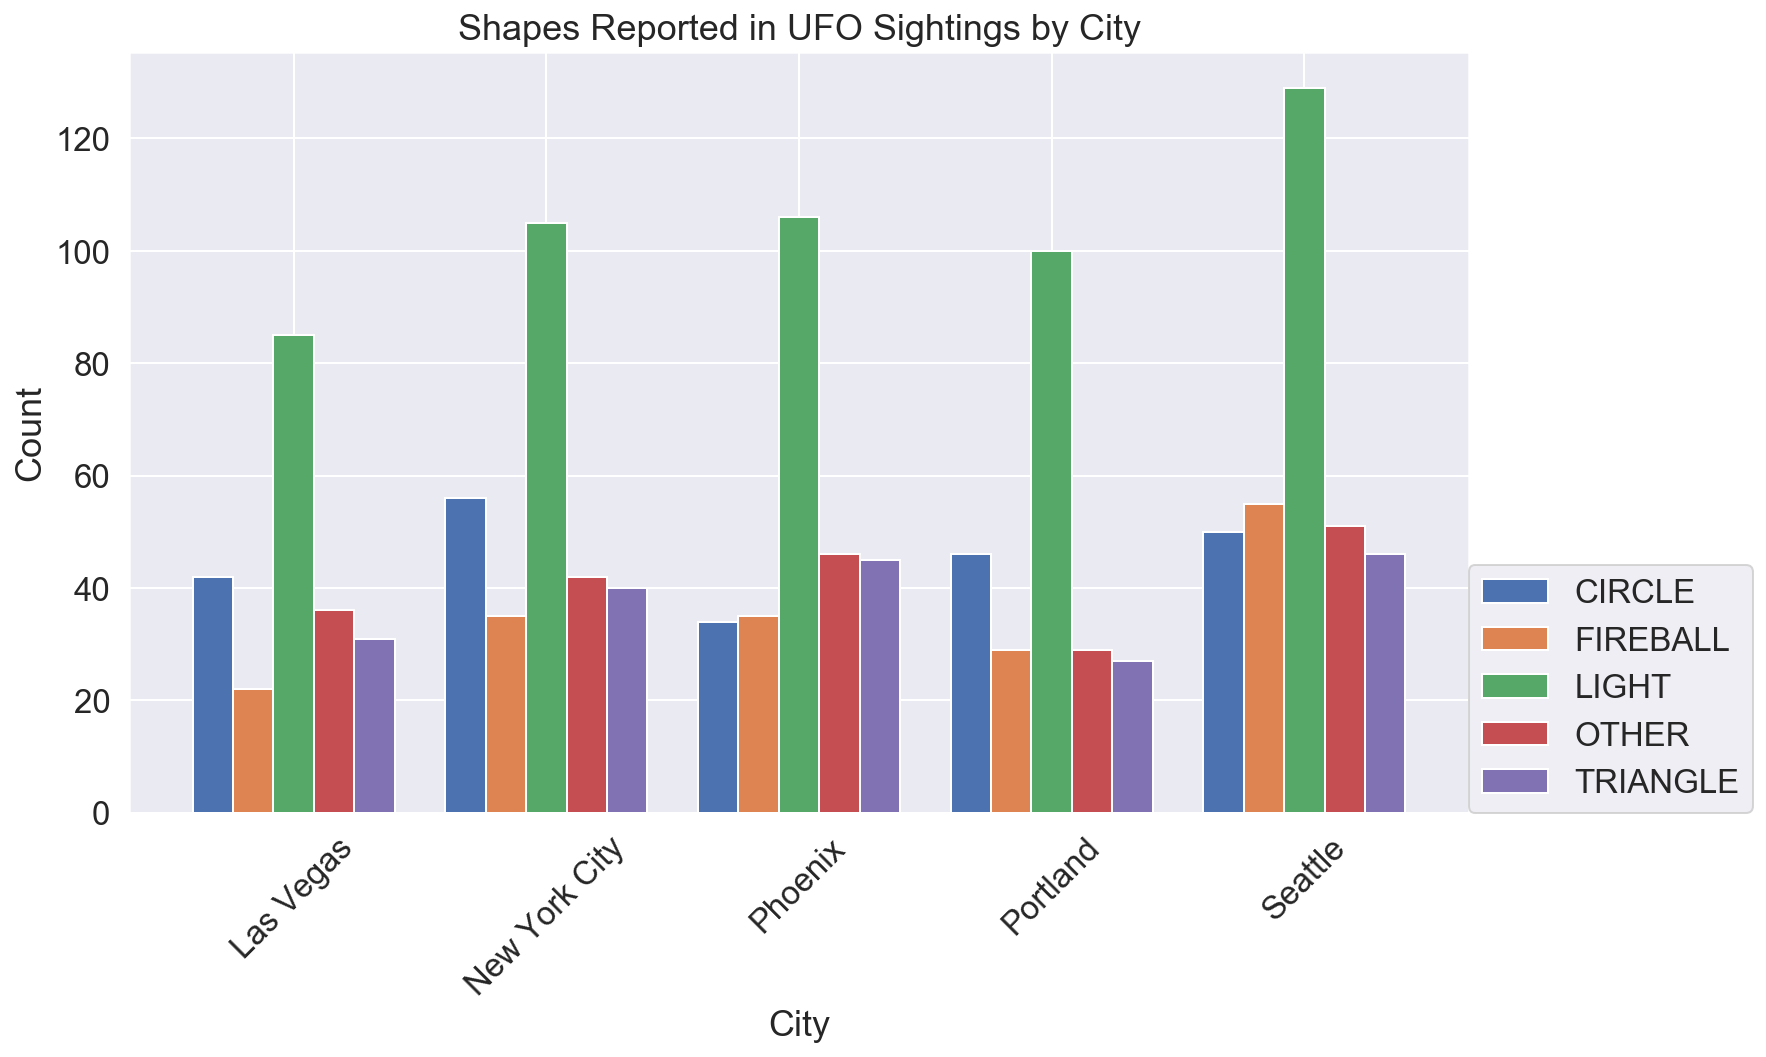

In [40]:
#but we could improve it! 
by_city_and_shape.unstack().plot(kind='bar',width=0.8, figsize=(12,7))
plt.ylabel('Count')
plt.xlabel('City')
plt.title('Shapes Reported in UFO Sightings by City')
plt.xticks(rotation=45)
plt.legend(loc=[1,0])
plt.show()